# Code to compare IMAS values from pyrokinetics with raw input files 
## Also plot the time-traces for different species 
Feb 25, 2025 

In [3]:
import numpy as np 
import json

import matplotlib.pyplot as plt 
import itertools 

import pandas as pd 

%matplotlib widget

In [4]:
data_dir = '/Users/venkitesh_work/Documents/work/Sapient_AI/Data/mgkdb_data/pyro_tests_data/data/CGYRO_nonlinear8_aaron_r_0.35_it_x/aaron_r_0.35_it_x/'

## Testing read from code 
with open(data_dir+"gyrokinetics.json", 'r') as j:
     imas = json.loads(j.read())


In [5]:
def load_config(filename):
    config = {}
    with open(filename, 'r') as f:
        for line in f:
            # Skip comments and empty lines
            line = line.strip()
            if line.startswith('#') or not line:
                continue
                
            # Split on '=' and clean up the parts
            key, value = line.split('=', 1)  # Split on first '=' only
            key = key.strip()
            value = value.strip()
            
            # Convert value to appropriate type
            try:
                # Try converting to int first
                value = int(value)
            except ValueError:
                try:
                    # Then try float
                    value = float(value)
                except ValueError:
                    # Keep as string if not numeric
                    pass
                    
            config[key] = value
    return config

ip1 = data_dir+'input.cgyro'
ip2 = data_dir+'input.gacode'
config = load_config(ip1)

In [6]:
imas['non_linear'].keys()

dict_keys(['max_repr_length', 'version', 'binormal_wavevector_norm', 'radial_wavevector_norm', 'angle_pol', 'time_norm', 'time_interval_norm', 'quasi_linear', 'code', 'fluxes_5d', 'fluxes_4d', 'fluxes_3d', 'fluxes_2d_k_x_sum', 'fluxes_2d_k_x_k_y_sum', 'fluxes_1d', 'fields_4d', 'fields_intensity_3d', 'fields_intensity_2d_surface_average', 'fields_zonal_2d', 'fields_intensity_1d', 'fluxes_5d_rotating_frame', 'fluxes_4d_rotating_frame', 'fluxes_3d_rotating_frame', 'fluxes_2d_k_x_sum_rotating_frame', 'fluxes_2d_k_x_k_y_sum_rotating_frame', 'fluxes_1d_rotating_frame'])

In [7]:
imas['flux_surface']['q']

0.95118

In [9]:
config.keys()

dict_keys(['NONLINEAR_FLAG', 'RMIN', 'PROFILE_MODEL', 'EQUILIBRIUM_MODEL', 'N_FIELD', 'MOMENT_PRINT_FLAG', 'KY', 'N_TOROIDAL', 'BOX_SIZE', 'N_RADIAL', 'N_XI', 'N_THETA', 'N_ENERGY', 'E_MAX', 'AMP', 'AMP0', 'UP_THETA', 'NUP_THETA', 'UP_RADIAL', 'NUP_RADIAL', 'UP_ALPHA', 'NUP_ALPHA', 'TOROIDALS_PER_PROC', 'DELTA_T_METHOD', 'DELTA_T', 'PRINT_STEP', 'MAX_TIME', 'RESTART_STEP', 'COLLISION_MODEL', 'ROTATION_MODEL', 'SHEAR_METHOD', 'GAMMA_E_SCALE', 'GAMMA_P_SCALE', 'MACH_SCALE', 'BETAE_UNIT_SCALE', 'BETA_STAR_SCALE', 'LAMBDA_STAR_SCALE', 'N_SPECIES', 'Z_1', 'Z_2', 'Z_3', 'Z_4', 'MASS_1', 'MASS_2', 'MASS_3', 'MASS_4', 'DENS_1', 'DENS_2', 'DENS_3', 'DENS_4', 'TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'DLNNDR_1', 'DLNNDR_2', 'DLNNDR_3', 'DLNNDR_4', 'DLNTDR_1', 'DLNTDR_2', 'DLNTDR_3', 'DLNTDR_4', 'RMAJ', 'Q', 'S', 'MACH', 'GAMMA_E', 'GAMMA_P', 'BETAE_UNIT', 'NU_EE', 'ZMAG', 'DZMAG', 'SHIFT', 'KAPPA', 'S_KAPPA', 'DELTA', 'S_DELTA', 'ZETA', 'S_ZETA', 'SHAPE_SIN3', 'SHAPE_SIN4', 'SHAPE_SIN5', 'SHAPE_CO

## Compare values from imas pyro and raw input 

In [10]:
param_keys = ['Q','KAPPA','RMIN','S','DLNNDR_4','DLNTDR_4','DLNNDR_1','DLNTDR_1']

def f_get_nested_dict_value(dict1, keys):
    result = dict1
    for k in keys:
        if k.isdigit():
            k = int(k)
        result = result[k]
    return result 

imas_keys =['flux_surface.q','flux_surface.elongation','flux_surface.r_minor_norm','flux_surface.magnetic_shear_r_minor',\
               'species.3.density_log_gradient_norm','species.3.temperature_log_gradient_norm','species.0.density_log_gradient_norm','species.0.temperature_log_gradient_norm']


In [11]:

for k1,k2 in zip(param_keys, imas_keys):
    # print('%s\t\t%s'%(key,config[key]))
    imas_out = f_get_nested_dict_value(imas, k2.split('.'))
    print(f'{k1:<45} {config[k1]:.6f}')
    print(f'{k2:<45} {imas_out:.6f}')


Q                                             0.951180
flux_surface.q                                0.951180
KAPPA                                         1.414100
flux_surface.elongation                       1.414100
RMIN                                          0.350000
flux_surface.r_minor_norm                     0.106357
S                                             0.098386
flux_surface.magnetic_shear_r_minor           0.098386
DLNNDR_4                                      1.181800
species.3.density_log_gradient_norm           3.889067
DLNTDR_4                                      2.560400
species.3.temperature_log_gradient_norm       8.425764
DLNNDR_1                                      1.185200
species.0.density_log_gradient_norm           3.900256
DLNTDR_1                                      1.988700
species.0.temperature_log_gradient_norm       6.544414


{
'gyrokineticsIMAS.flux_surface.q': 'Q',
'gyrokineticsIMAS.flux_surface.elongation': 'KAPPA',
'gyrokineticsIMAS.flux_surface.r_minor_norm': 'RMIN',
'gyrokineticsIMAS.flux_surface.magnetic_shear_r_minor': 'S',
'gyrokineticsIMAS.species.3.density_log_gradient_norm': 'DLNNDR_4',
'gyrokineticsIMAS.species.3.temperature_log_gradient_norm': 'DLNTDR_4',
'gyrokineticsIMAS.species.0.density_log_gradient_norm': 'DLNNDR_1',
'gyrokineticsIMAS.species.0.temperature_log_gradient_norm': 'DLNTDR_1'
}

## Testing time trace entries

In [15]:
t1 = imas['non_linear']['fluxes_2d_k_x_k_y_sum']

plot_vars = [i for i,j in t1.items() if (isinstance(j,list) and np.array(j).shape[0]>0)]
species = ['deuterium', 'tritium', 'lumped impurity', 'electron']



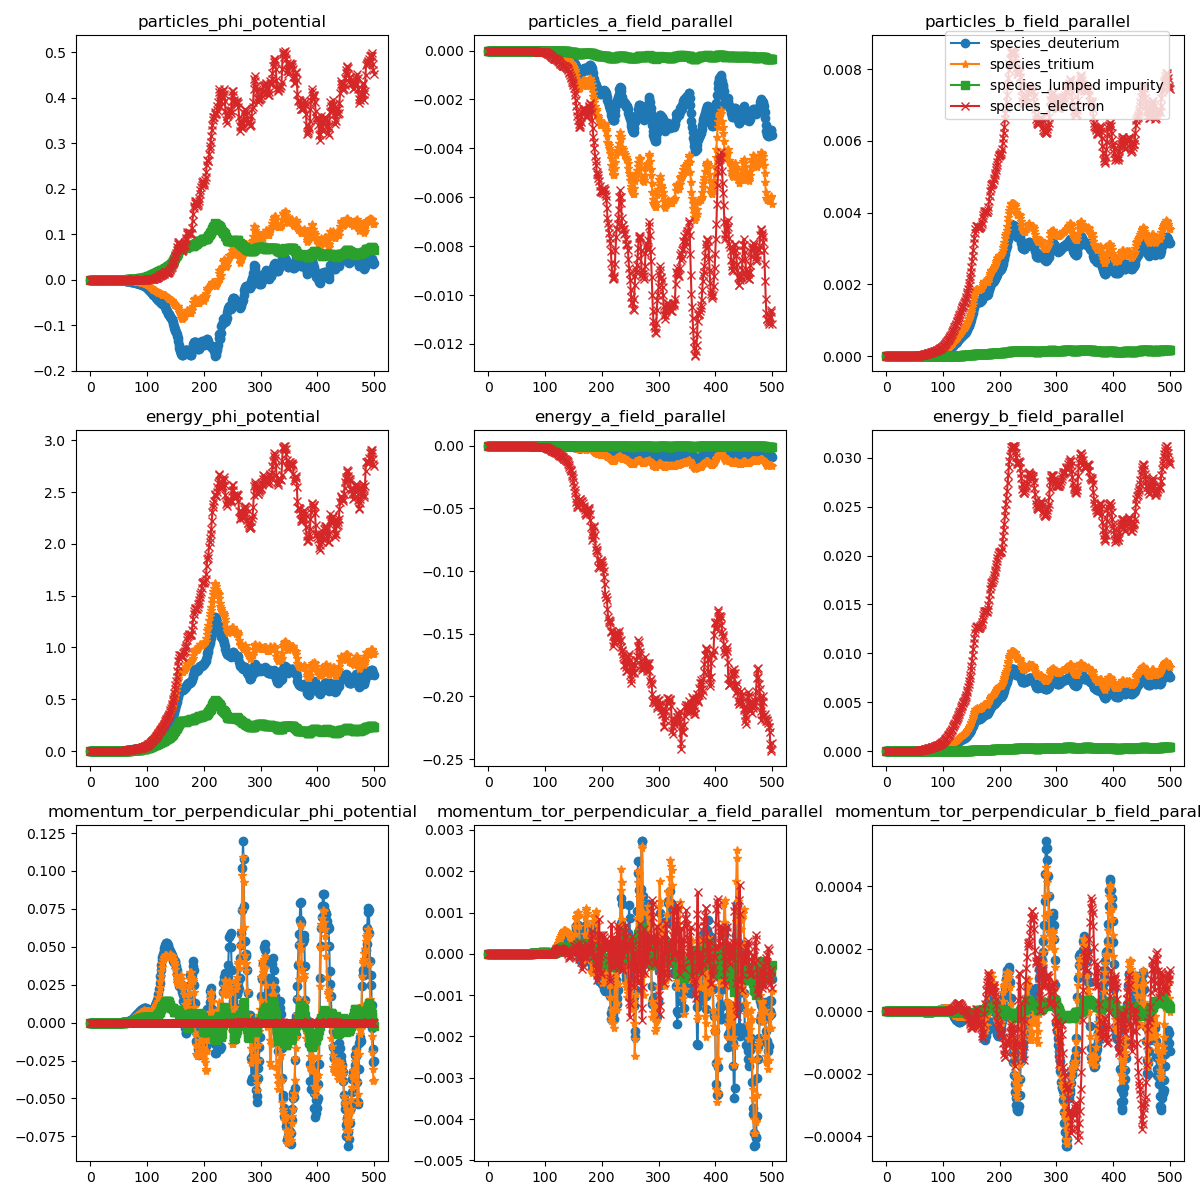

In [13]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Adjust figsize as needed

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()


# List to store the line objects and labels for the legend
lines = []
labels = []
# Loop through the keys and plot each in its subplot
for idx, key in enumerate(plot_vars[:9]):  # Limit to 9 in case more keys exist
    ax = axes[idx]
    for (i,j),marker in zip(enumerate(species),itertools.cycle('o*sxDhp')):
        line, = ax.plot(t1[key][i], marker=marker, label=f'species_{j}')

        if idx == 0:  # Only collect lines/labels from the first subplot
            lines.append(line)
            labels.append(f'species_{j}')
    ax.set_title(key)  # Optional: add title to each subplot

fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()




In [ ]:
imas.keys()

In [ ]:
imas['code']

In [16]:
t1

{'max_repr_length': 64,
 'version': {'idspy_version': '034000.2.0',
  'imas_dd_git_commit': '845f1b30816f86a3cd4d53714dc56cdd307fdca1',
  'imas_dd_version': '03.40.00',
  'idspy_internal_version': '2.0'},
 'particles_phi_potential': [[-1.3558822530711988e-07,
   5.240571246399431e-07,
   6.006239506576818e-07,
   3.057522801965288e-07,
   -3.188865246836396e-08,
   -2.674899627425649e-07,
   -5.046062296191863e-07,
   -6.898478658354746e-07,
   -9.27625991869713e-07,
   -1.0905129528519268e-06,
   -1.150563875748567e-06,
   -1.1856249591166423e-06,
   -1.2315990783547461e-06,
   -1.293875387001971e-06,
   -1.39097591268213e-06,
   -1.5289399892596143e-06,
   -1.7022185661908496e-06,
   -1.910237978374717e-06,
   -2.1587219550687896e-06,
   -2.461891385391218e-06,
   -2.8338120085490843e-06,
   -3.2843625634373584e-06,
   -3.81699168610126e-06,
   -4.436965073966705e-06,
   -5.1623181005412775e-06,
   -6.022828824339653e-06,
   -7.04863726625279e-06,
   -8.265458173348109e-06,
   -9.694

In [19]:
df = pd.DataFrame(columns = plot_vars)
df

,particles_phi_potential,particles_a_field_parallel,particles_b_field_parallel,energy_phi_potential,energy_a_field_parallel,energy_b_field_parallel,momentum_tor_perpendicular_phi_potential,momentum_tor_perpendicular_a_field_parallel,momentum_tor_perpendicular_b_field_parallel


In [20]:
for key in plot_vars:
    print(t1[key].shape)

AttributeError: 'list' object has no attribute 'shape'

In [21]:
t1[key]

[[-1.3558822530711988e-07,
  5.240571246399431e-07,
  6.006239506576818e-07,
  3.057522801965288e-07,
  -3.188865246836396e-08,
  -2.674899627425649e-07,
  -5.046062296191863e-07,
  -6.898478658354746e-07,
  -9.27625991869713e-07,
  -1.0905129528519268e-06,
  -1.150563875748567e-06,
  -1.1856249591166423e-06,
  -1.2315990783547461e-06,
  -1.293875387001971e-06,
  -1.39097591268213e-06,
  -1.5289399892596143e-06,
  -1.7022185661908496e-06,
  -1.910237978374717e-06,
  -2.1587219550687896e-06,
  -2.461891385391218e-06,
  -2.8338120085490843e-06,
  -3.2843625634373584e-06,
  -3.81699168610126e-06,
  -4.436965073966705e-06,
  -5.1623181005412775e-06,
  -6.022828824339653e-06,
  -7.04863726625279e-06,
  -8.265458173348109e-06,
  -9.694736766149433e-06,
  -1.135948116638681e-05,
  -1.328914587006675e-05,
  -1.5521126682532468e-05,
  -1.8100508425418045e-05,
  -2.1085406809173715e-05,
  -2.4546355837115716e-05,
  -2.856303082985476e-05,
  -3.322264289182812e-05,
  -3.8626593209923944e-05,
  -4